In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('datasets/train.csv')
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
train_df.drop(["Unnamed: 0","id"] , axis=1, inplace=True)
train_df.columns = train_df.columns.str.lower().str.replace(" ","_").str.replace("-","_")

In [4]:
train_df.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type_of_travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight_distance                    103904 non-null  int64  
 6   inflight_wifi_service              103904 non-null  int64  
 7   departure/arrival_time_convenient  103904 non-null  int64  
 8   ease_of_online_booking             103904 non-null  int64  
 9   gate_location                      103904 non-null  int64  
 10  food_and_drink                     103904 non-null  int64  
 11  online_boarding                    1039

In [6]:
qual_vars = train_df.select_dtypes(include="object")
for col in qual_vars:
    train_df[col] = train_df[col].str.lower().str.replace(" ","_")

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
flight_distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
inflight_wifi_service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
departure/arrival_time_convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
ease_of_online_booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
gate_location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
food_and_drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
online_boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
seat_comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
inflight_entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [8]:
for col in train_df.columns:
    if train_df[col].nunique() <= 10:
        print("{}:".format(col))
        print(train_df[col].unique())
        print("="*64)

gender:
['male' 'female']
customer_type:
['loyal_customer' 'disloyal_customer']
type_of_travel:
['personal_travel' 'business_travel']
class:
['eco_plus' 'business' 'eco']
inflight_wifi_service:
[3 2 4 1 5 0]
departure/arrival_time_convenient:
[4 2 5 3 1 0]
ease_of_online_booking:
[3 2 5 4 1 0]
gate_location:
[1 3 2 5 4 0]
food_and_drink:
[5 1 2 4 3 0]
online_boarding:
[3 5 2 1 4 0]
seat_comfort:
[5 1 2 3 4 0]
inflight_entertainment:
[5 1 2 3 4 0]
on_board_service:
[4 1 2 3 5 0]
leg_room_service:
[3 5 4 2 1 0]
baggage_handling:
[4 3 5 1 2]
checkin_service:
[4 1 3 5 2 0]
inflight_service:
[5 4 3 1 2 0]
cleanliness:
[5 1 2 3 4 0]
satisfaction:
['neutral_or_dissatisfied' 'satisfied']


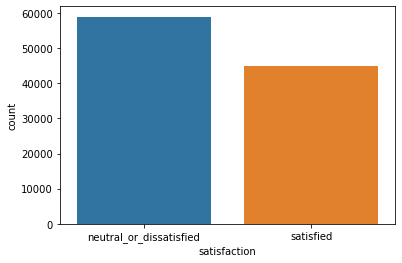

In [9]:
# Variable objetivo
sns.countplot(x=train_df.satisfaction)
plt.show()

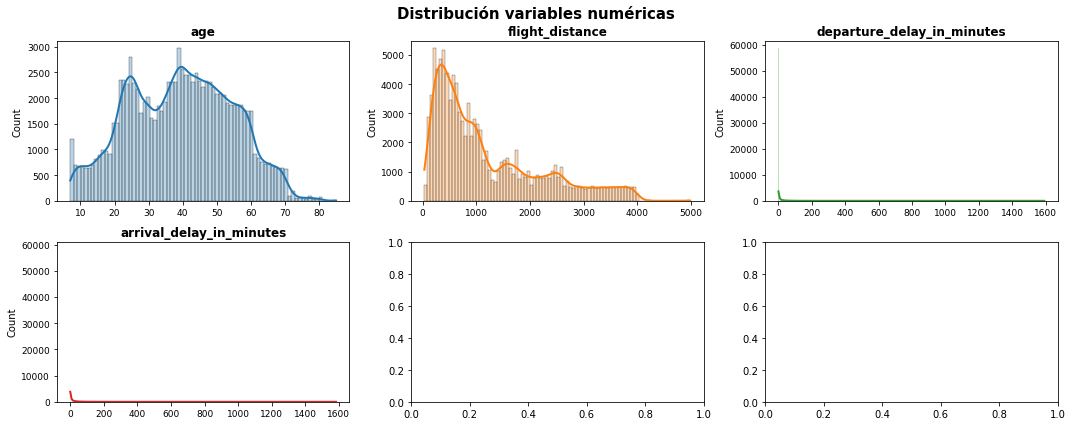

In [10]:
%run ./auxiliar_functions/distribution_plot.ipynb

distribution_plot(train_df)

In [11]:
cat_vars = ['gender','customer_type','type_of_travel','class'] # Categorical features
float_vars = ['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes'] # Floating features
int_vars = list(train_df.select_dtypes(exclude="object").columns)
int_vars = [var for var in int_vars if var not in float_vars] # Integer Features

le = LabelEncoder()
y_train = le.fit_transform(train_df.satisfaction)

cat_transformer = Pipeline([
    ("cat_transformer", OneHotEncoder())])

num_transformer = Pipeline([
    ("int_transformer", OrdinalEncoder())])

full_pipeline = ColumnTransformer(transformers=[
    ('cat_trans', cat_transformer, cat_vars),
    ('num_trans', num_transformer, int_vars)
],remainder='drop')

X_prepared = full_pipeline.fit_transform(train_df)

In [12]:
# Searching for the best model
# ===================================================================================

models = {'svc': SVC(), 
          'logistic': LogisticRegression(),
          'random_forest': RandomForestClassifier()
         }

n_models = len(models)
scores=[]
for name, model in models.items():
    y_train_pred = cross_val_predict(model, X_prepared, y_train, cv=3, n_jobs=-1)
    # Metrics score
    accuracy = np.mean(accuracy_score(y_train, y_train_pred)).round(2)
    precision = np.mean(precision_score(y_train, y_train_pred)).round(2)
    recall = np.mean(recall_score(y_train, y_train_pred)).round(2)
    f1 = np.mean(f1_score(y_train, y_train_pred)).round(2)

    model_scores = np.array([name, accuracy, precision, recall, f1])
    scores.append(np.array(model_scores))
          
scores_df = pd.DataFrame(scores, columns=['Model','Accuracy','Precision','Recall','F1'])
scores_df.set_index('Model', inplace=True)
scores_df.sort_values(by='F1', ascending=False)

,Accuracy,Precision,Recall,F1
Model,,,,
random_forest,0.96,0.97,0.94,0.95
svc,0.94,0.95,0.92,0.93
logistic,0.87,0.87,0.84,0.85


In [13]:
# Classification Report & Confusion Matrix
# ==============================================================================
rforest_clf = RandomForestClassifier(random_state=42)
y_pred = cross_val_predict(rforest_clf, X_prepared, y_train)
print("Classification Report")
print("="*64)
print(confusion_matrix(y_train, y_pred))
print()
print("Classification Report")
print("="*64)
print(classification_report(y_train, y_pred))

Classification Report
[[57521  1358]
 [ 2829 42196]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     58879
           1       0.97      0.94      0.95     45025

    accuracy                           0.96    103904
   macro avg       0.96      0.96      0.96    103904
weighted avg       0.96      0.96      0.96    103904



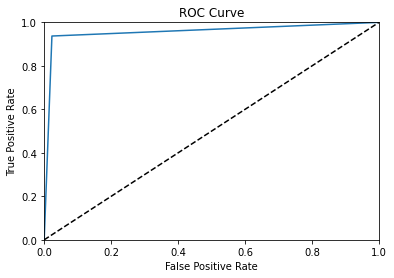

In [14]:
# AUC
# ================================================================================
y_probas = cross_val_predict(rforest_clf, X_prepared, y_train, 
                             cv=5, method='predict_proba', n_jobs=-1)
y_scores = y_probas[:,1]
threshold = 0.5
y_with_thres = (y_scores > threshold)
fpr, tpr, thresholds = roc_curve(y_train, y_with_thres)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [15]:
precision_score(y_train, y_with_thres)

0.9688203150112504

In [16]:
recall_score(y_train, y_with_thres)

0.9371682398667407

In [17]:
roc_auc_score(y_train, y_with_thres)

0.9570519947274395

In [18]:
final_model = RandomForestClassifier(random_state=0)
final_model.fit(X_prepared, y_train)

RandomForestClassifier(random_state=0)

In [19]:
test_df = pd.read_csv('datasets/test.csv')
test_df.columns = test_df.columns.str.lower().str.replace(" ","_").str.replace("-","_")

X_test = test_df
y_test = test_df.pop('satisfaction')

X_test = full_pipeline.transform(X_test)

ValueError: X has 24 features, but ColumnTransformer is expecting 23 features as input.

In [ ]:

predictions = final_model.predict(X_test)

In [ ]:
precision_score(predictions, y_test)

/home/pablo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pablo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres